In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_parquet("blockgroup-data.parquet", engine="pyarrow")
df

,GEOID10,profile,time_limit,average_area,average_num_poi,average_rating_poi,area_m2,avg_stars,is_choice_neighborhood,no_truck_length,distance_pool,avg_housing_price,foreclosure_count,foreclosure_over_area,center_latitude,center_longitude
0,421010260001,car,600,2.278897e+08,1903.6,3.539399,2.241907e+08,3.471898,False,104099.259256,0.000000,13440.0,516,2.301612e-06,40.077237,40.077237
1,421010260001,car,1800,3.044472e+09,27790.4,3.580427,3.028444e+09,3.630835,True,944060.393496,0.000000,12224.0,2849,9.407471e-07,40.077237,40.077237
2,421010260001,car,1200,1.101597e+09,15217.8,3.587148,1.090266e+09,3.606000,True,723993.828374,0.000000,12672.0,2069,1.897701e-06,40.077237,40.077237
3,421010260001,foot,600,1.910402e+06,37.8,2.835979,1.960643e+06,2.833333,False,0.000000,0.018072,17872.0,10,5.100368e-06,40.077237,40.077237
4,421010260001,foot,1800,1.845046e+07,180.0,3.166667,1.876580e+07,3.215789,False,4202.218549,0.004498,17376.0,71,3.783479e-06,40.077237,40.077237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12019,421010219001,foot,1800,1.323738e+07,134.8,3.534866,1.128336e+07,3.544000,False,12170.069163,0.006177,28544.0,7,6.203825e-07,40.050977,40.050977
12020,421010219001,foot,1200,5.393688e+06,59.2,3.724662,3.796839e+06,4.125000,False,1609.567635,0.011729,29350.0,3,7.901310e-07,40.050977,40.050977
12021,421010219001,pt,600,4.427762e+05,3.4,4.029412,9.063385e+04,NaN,False,0.000000,0.019557,NaN,0,0.000000e+00,40.050977,40.050977
12022,421010219001,pt,1800,1.109884e+07,274.4,3.580904,9.385261e+06,3.559917,False,20072.031683,0.000222,29299.0,7,7.458503e-07,40.050977,40.050977


In [2]:
isochrone_dfs = {
    
}

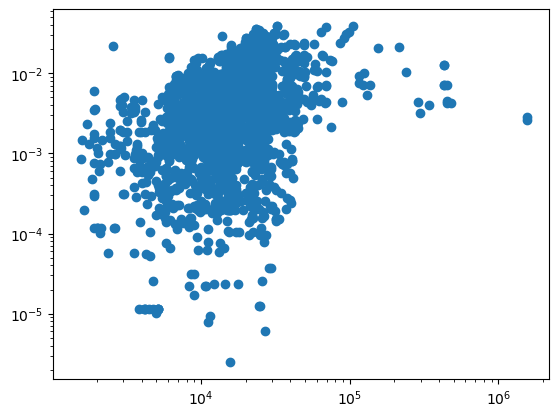

In [3]:
plt.scatter(df["avg_housing_price"], df["distance_pool"])
plt.yscale("log")
plt.xscale("log")

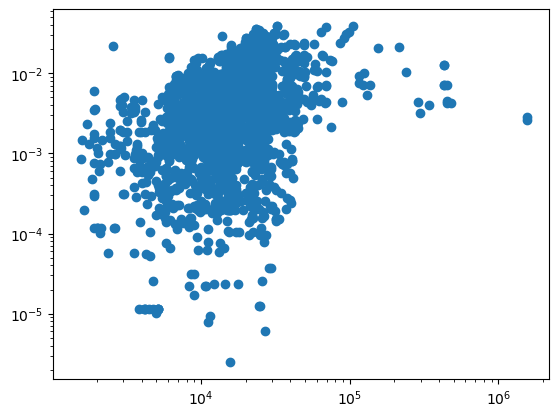

In [4]:
plt.scatter(df["avg_housing_price"], df["distance_pool"])
plt.yscale("log")
plt.xscale("log")

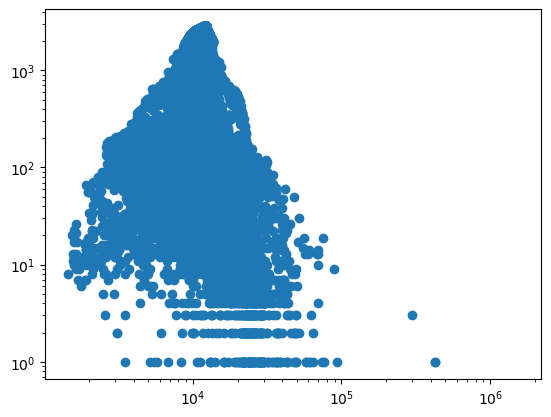

In [5]:
plt.scatter(df["avg_housing_price"], df["foreclosure_count"])
plt.yscale("log")
plt.xscale("log")

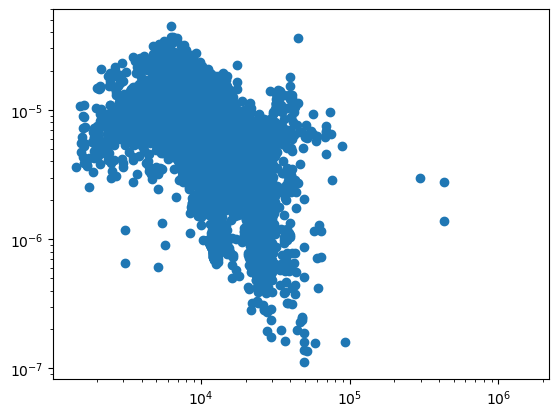

In [6]:
plt.scatter(df["avg_housing_price"], df["foreclosure_over_area"])
plt.yscale("log")
plt.xscale("log")

In [7]:
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

df = df.dropna()

X = df[["distance_pool", "foreclosure_count", "is_choice_neighborhood", "average_num_poi", "average_rating_poi", "profile", "time_limit", "foreclosure_over_area", "no_truck_length"]]
y = df["avg_housing_price"]

X = pd.get_dummies(X, columns=["is_choice_neighborhood", "profile"], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=8)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=8, random_state=42)

In [8]:
model.score(X_test, y_test)

0.38496603689756625

In [9]:
model.score(X_test, y_test)

0.38496603689756625

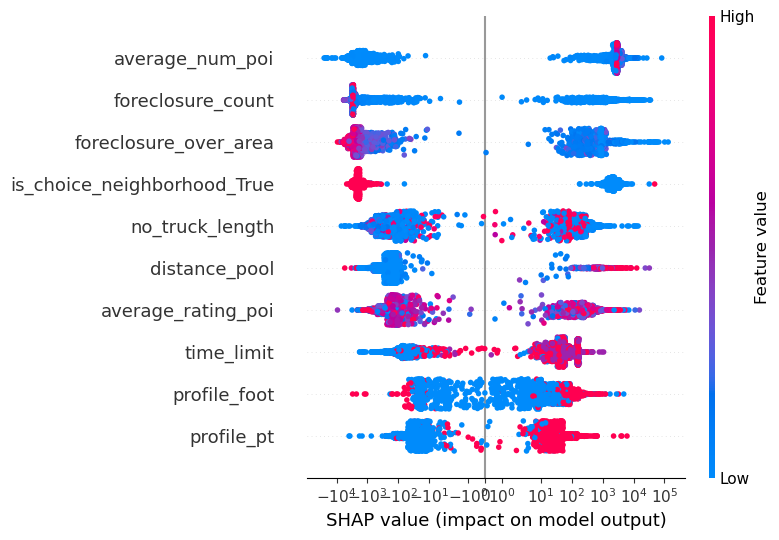

In [10]:
import shap
import numpy as np

explainer = shap.TreeExplainer(model, feature_perturbation="tree_path_dependent", model_output="raw")
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, show=False, use_log_scale=True)